<html>
<font color = green size = 6>
<b>
Time Series Forecasting of hourly data using ARIMA model
</b>
</font>
</html>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('timeseries_wow_hourly_train.csv')
print ('\n Data Types:')
print (df1.dtypes)


 Data Types:
DateTime        object
PlayersCount     int64
dtype: object


In [3]:
df1.reset_index(inplace=True)
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
data = df1.set_index('DateTime')

In [4]:
data.sort_index(inplace = True)

In [5]:
ts = data['PlayersCount'] 
ts.head(10)

DateTime
2006-01-01 00:00:00    4878
2006-01-01 01:00:00    4854
2006-01-01 02:00:00    4558
2006-01-01 03:00:00    3794
2006-01-01 04:00:00    2870
2006-01-01 05:00:00    2004
2006-01-01 06:00:00    1376
2006-01-01 07:00:00    1134
2006-01-01 08:00:00    1304
2006-01-01 09:00:00    1956
Name: PlayersCount, dtype: int64

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

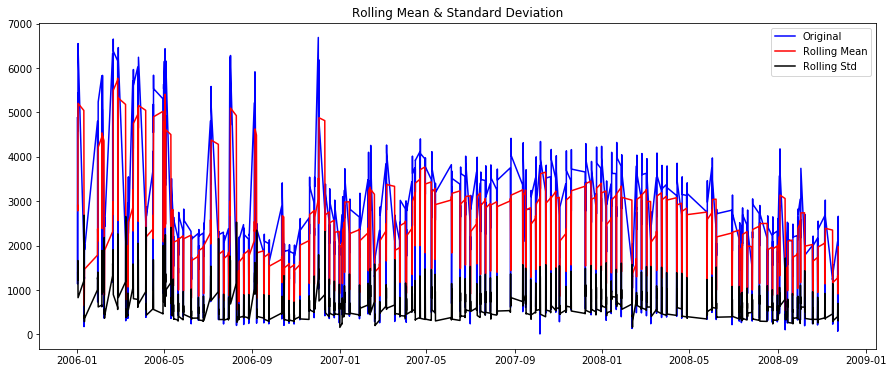

Results of Dickey-Fuller Test:
Test Statistic                -8.248593e+00
p-value                        5.468202e-13
#Lags Used                     2.900000e+01
Number of Observations Used    3.138000e+03
Critical Value (1%)           -3.432436e+00
Critical Value (5%)           -2.862461e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [7]:
test_stationarity(ts)

Estimating & Eliminating Trend

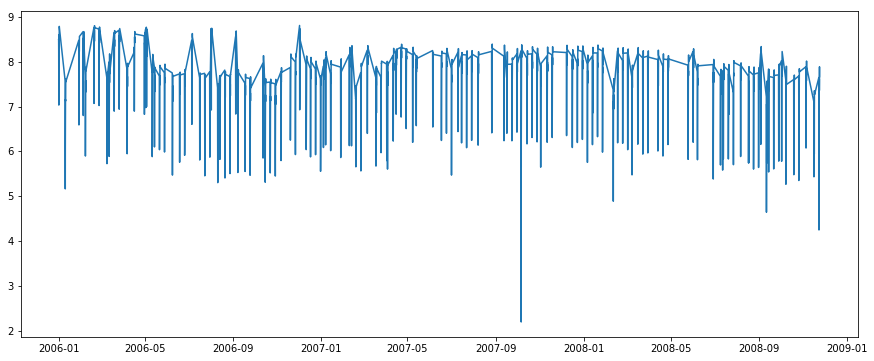

In [8]:
ts_log = np.log(ts)
plt.plot(ts_log)

Moving average

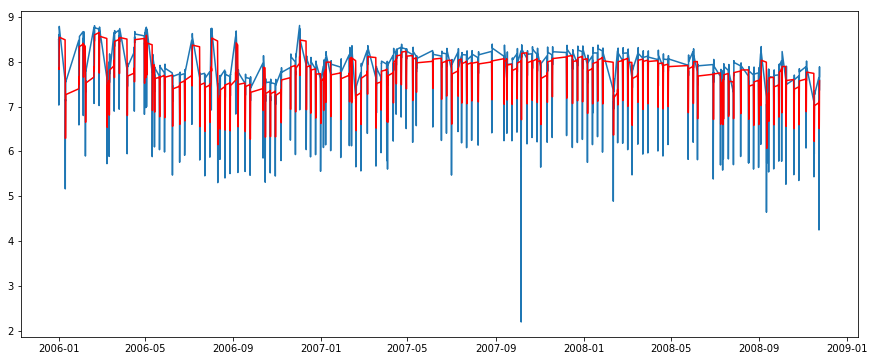

In [9]:
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [10]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

DateTime
2006-01-01 00:00:00         NaN
2006-01-01 01:00:00         NaN
2006-01-01 02:00:00         NaN
2006-01-01 03:00:00         NaN
2006-01-01 04:00:00         NaN
2006-01-01 05:00:00         NaN
2006-01-01 06:00:00         NaN
2006-01-01 07:00:00         NaN
2006-01-01 08:00:00         NaN
2006-01-01 09:00:00         NaN
2006-01-01 10:00:00         NaN
2006-01-01 11:00:00    0.283016
Name: PlayersCount, dtype: float64

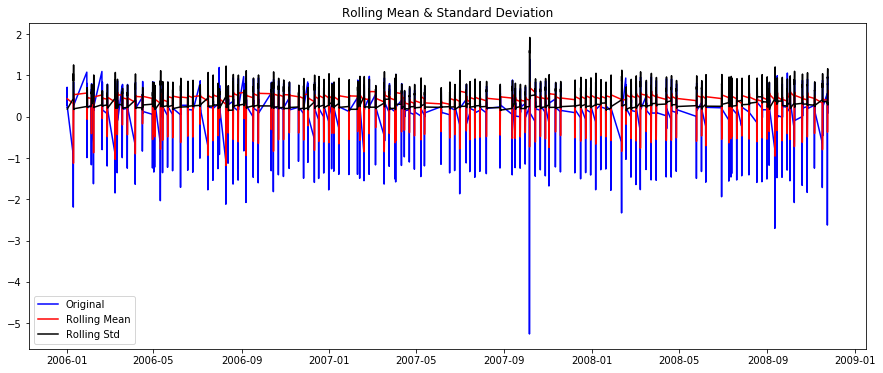

Results of Dickey-Fuller Test:
Test Statistic                -1.234013e+01
p-value                        6.145129e-23
#Lags Used                     2.800000e+01
Number of Observations Used    3.128000e+03
Critical Value (1%)           -3.432442e+00
Critical Value (5%)           -2.862464e+00
Critical Value (10%)          -2.567262e+00
dtype: float64


In [11]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

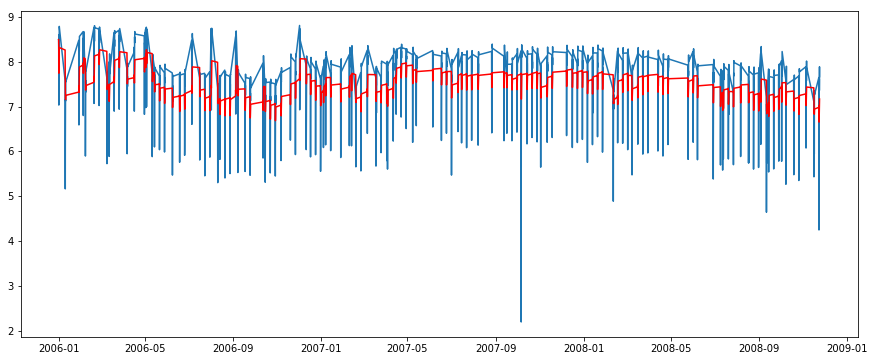

In [12]:
expwighted_avg = ts_log.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

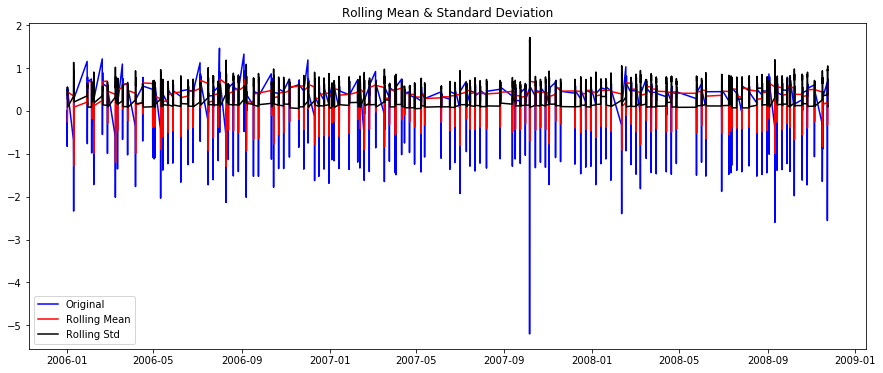

Results of Dickey-Fuller Test:
Test Statistic                -1.289528e+01
p-value                        4.361917e-24
#Lags Used                     2.900000e+01
Number of Observations Used    3.138000e+03
Critical Value (1%)           -3.432436e+00
Critical Value (5%)           -2.862461e+00
Critical Value (10%)          -2.567261e+00
dtype: float64


In [13]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

Eliminating Trend and Seasonality

Differencing – taking the differece with a particular time lag

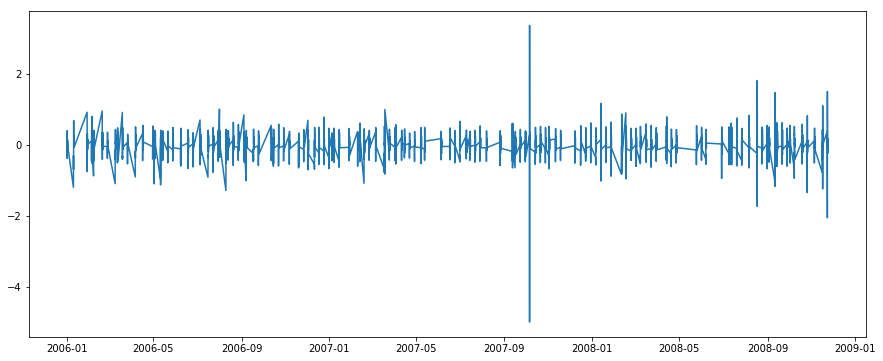

In [14]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

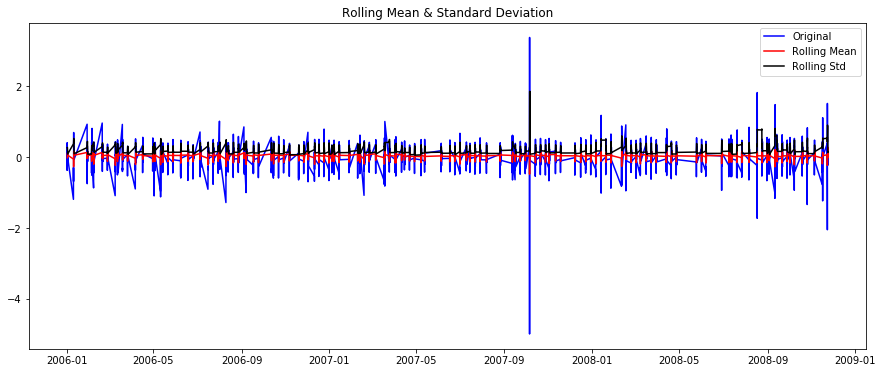

Results of Dickey-Fuller Test:
Test Statistic                -1.193690e+01
p-value                        4.639598e-22
#Lags Used                     2.700000e+01
Number of Observations Used    3.139000e+03
Critical Value (1%)           -3.432435e+00
Critical Value (5%)           -2.862461e+00
Critical Value (10%)          -2.567260e+00
dtype: float64


In [15]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [16]:
ts_log.index

DatetimeIndex(['2006-01-01 00:00:00', '2006-01-01 01:00:00',
               '2006-01-01 02:00:00', '2006-01-01 03:00:00',
               '2006-01-01 04:00:00', '2006-01-01 05:00:00',
               '2006-01-01 06:00:00', '2006-01-01 07:00:00',
               '2006-01-01 08:00:00', '2006-01-01 09:00:00',
               ...
               '2008-11-23 14:00:00', '2008-11-23 15:00:00',
               '2008-11-23 16:00:00', '2008-11-23 17:00:00',
               '2008-11-23 18:00:00', '2008-11-23 19:00:00',
               '2008-11-23 20:00:00', '2008-11-23 21:00:00',
               '2008-11-23 22:00:00', '2008-11-23 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=3168, freq=None)

Decomposition – modeling both trend and seasonality and removing them from the model.

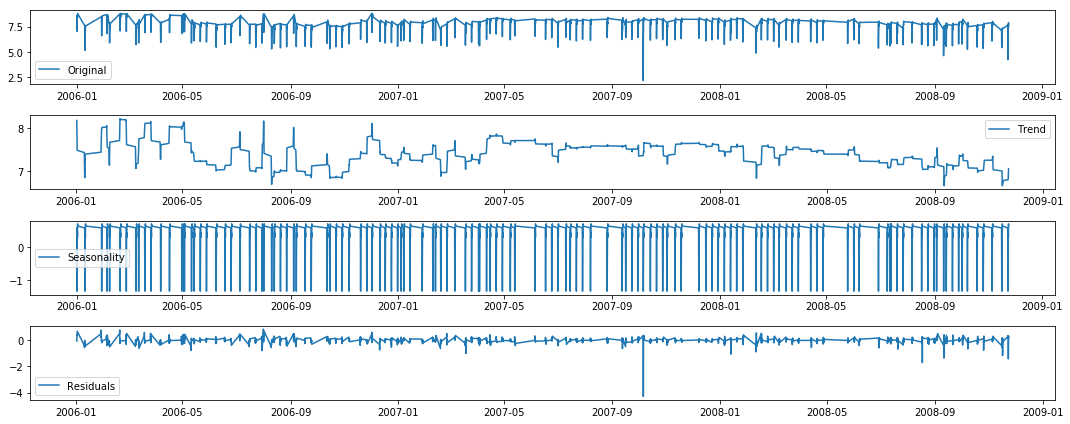

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

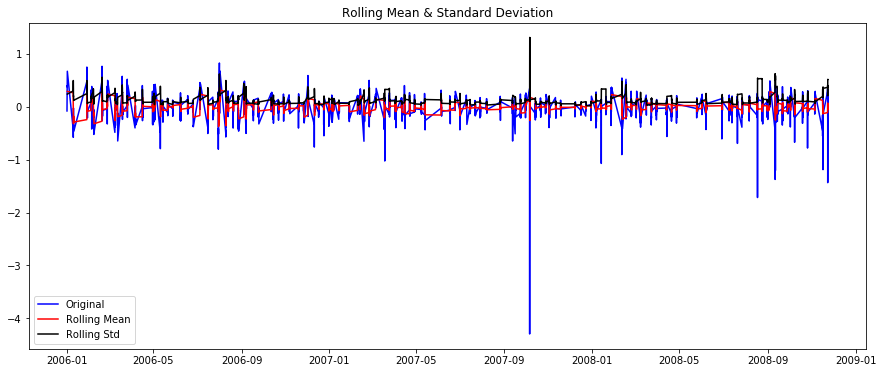

Results of Dickey-Fuller Test:
Test Statistic                -1.701887e+01
p-value                        8.485444e-30
#Lags Used                     2.900000e+01
Number of Observations Used    3.114000e+03
Critical Value (1%)           -3.432452e+00
Critical Value (5%)           -2.862469e+00
Critical Value (10%)          -2.567264e+00
dtype: float64


In [18]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Forecasting a Time Series

In [19]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [20]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

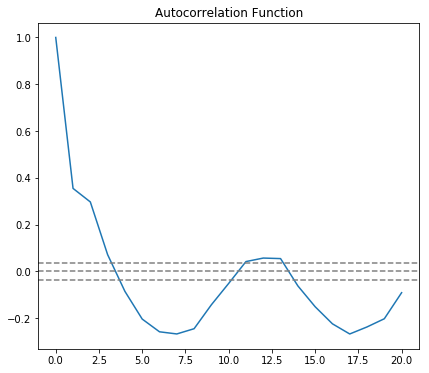

In [21]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

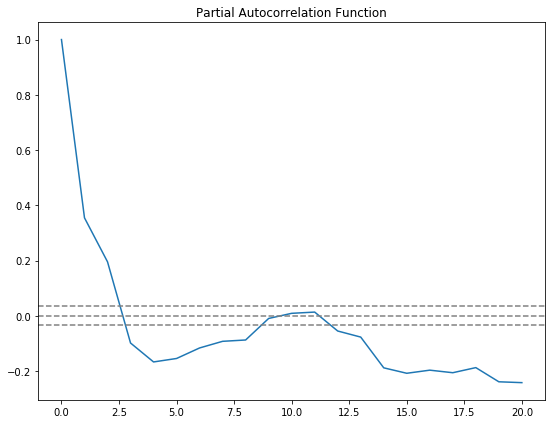

In [22]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [23]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 250.2308')

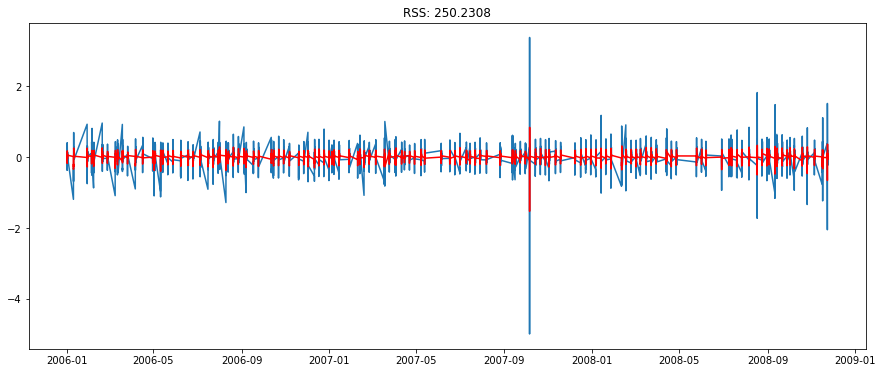

In [24]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 250.6376')

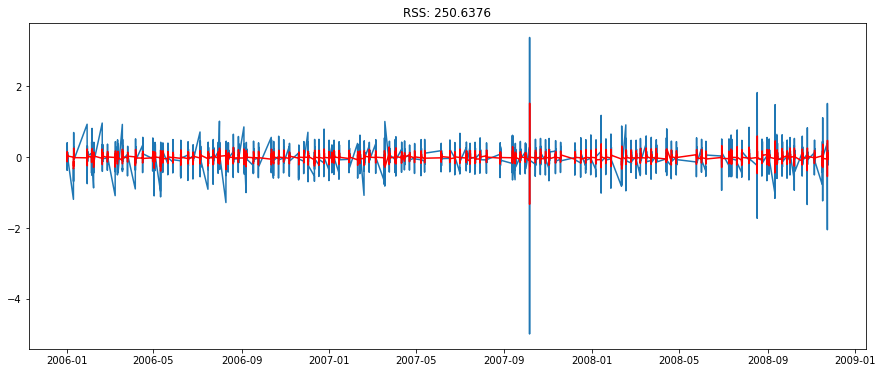

In [25]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 250.6376')

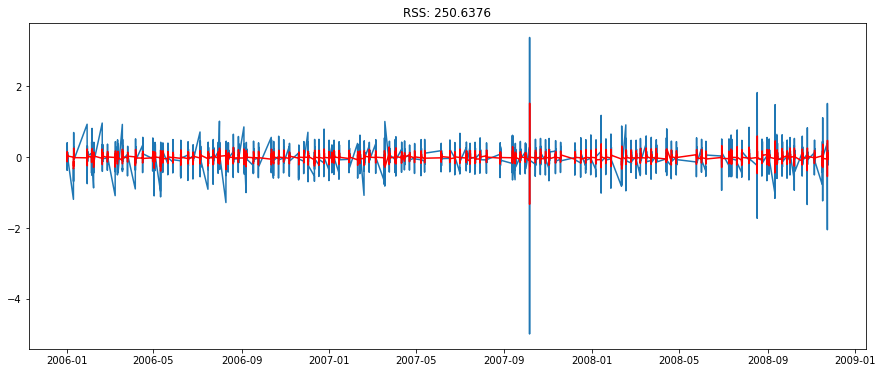

In [26]:
#model = ARIMA(ts_log, order=(2, 1, 2))  
model = ARIMA(ts_log, order=(0, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

DateTime
2006-01-01 01:00:00   -0.000286
2006-01-01 02:00:00   -0.001607
2006-01-01 03:00:00   -0.015736
2006-01-01 04:00:00   -0.059457
2006-01-01 05:00:00   -0.102108
dtype: float64


In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

DateTime
2006-01-01 01:00:00   -0.000286
2006-01-01 02:00:00   -0.001892
2006-01-01 03:00:00   -0.017628
2006-01-01 04:00:00   -0.077085
2006-01-01 05:00:00   -0.179193
dtype: float64


In [30]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

DateTime
2006-01-01 00:00:00    8.492491
2006-01-01 01:00:00    8.492205
2006-01-01 02:00:00    8.490598
2006-01-01 03:00:00    8.474862
2006-01-01 04:00:00    8.415406
dtype: float64

Text(0.5,1,'RMSE: 965.2724')

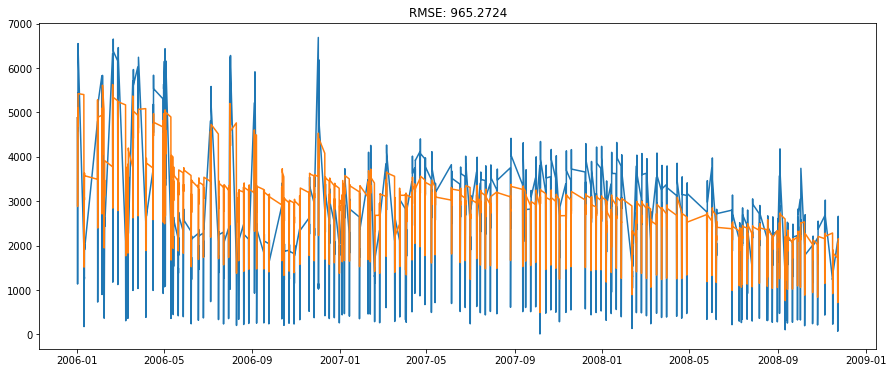

In [31]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [32]:
def MAPE(Observed, Predictions):
    n = len(Observed)
    MAPE = []
    for i in range(n):
        MAPE.append(abs((Observed[i] - Predictions[i]/Observed[i])))
    return sum(MAPE)*100/n

In [33]:
MAPE(ts,predictions_ARIMA)

205000.07605070341